# DIABETIC PATIENT'S DATA ANALYSIS OF THE DATA FROM GLUCOSE MONITORS, ACTIVITY SENSORS, SLEEP SENSORS AND LOCATION MONITORS

# Importing the necessary python packages and modules

In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Connecting to the data for analysis

In [332]:
g = pd.read_csv('cgm_date.csv')
steps = pd.read_csv('steps_date.csv')
sleep = pd.read_csv('beddit_date.csv')
gps = pd.read_csv('loc_date.csv')

# File namimg explanation:

g is the file that contains the data about the user glucose measurements from the sensor

steps conatins the data from the activity monitor of the patient

sleep contains the data from the device 'beddit' which tracks inforamtion about the users sleep timings

gps contains users location data and the amount fo time he spent in a particular location.

# Exploratory data analysis

In [333]:
g.dtypes

cgmdate                int64
cgmtime                int64
Historic_ Glucose    float64
Scan_Glucose         float64
dtype: object

In [309]:
steps.dtypes

stepsdate      int64
stepstime      int64
active_time    int64
distance       int64
id             int64
steps          int64
dtype: object

In [310]:
sleep.dtypes

Unnamed: 0              int64
start_date              int64
start_time              int64
end_date                int64
end_time                int64
sleep_duration          int64
wake_duration           int64
away_duration           int64
resting_heart_rate    float64
avr_resp_rate         float64
dtype: object

In [311]:
gps.dtypes

enddate              int64
endtime              int64
startdate            int64
starttime            int64
time_spent\nH:MM    object
type                object
dtype: object

# Checking the null values in the datasets

In [312]:
g.isnull().sum()

cgmdate                 0
cgmtime                 0
Historic_ Glucose     949
Scan_Glucose         5892
dtype: int64

In [313]:
steps.isnull().sum()

stepsdate      0
stepstime      0
active_time    0
distance       0
id             0
steps          0
dtype: int64

In [314]:
sleep.isnull().sum()

Unnamed: 0            0
start_date            0
start_time            0
end_date              0
end_time              0
sleep_duration        0
wake_duration         0
away_duration         0
resting_heart_rate    0
avr_resp_rate         0
dtype: int64

In [315]:
gps.isnull().sum()

enddate             0
endtime             0
startdate           0
starttime           0
time_spent\nH:MM    0
type                0
dtype: int64

# Removing the null values -migrating null values in the feature Historic_ Glucose with values from scan_Glucose

In [334]:
g.loc[g['Historic_ Glucose'].isnull(), 'Historic_ Glucose'] = g['Scan_Glucose']

#Rechecking for null values

In [318]:
g.isnull().sum()

cgmdate                 0
cgmtime                 0
Historic_ Glucose       3
Scan_Glucose         5892
dtype: int64

# Feature Assessment / Feature Engineering

#Assessing the various features of the dataset 

In [320]:
g.columns

Index(['cgmdate', 'cgmtime', 'Historic_ Glucose', 'Scan_Glucose'], dtype='object')

In [321]:
steps.columns

Index(['stepsdate', 'stepstime', 'active_time', 'distance', 'id', 'steps'], dtype='object')

In [322]:
sleep.columns

Index(['Unnamed: 0', 'start_date', 'start_time', 'end_date', 'end_time',
       'sleep_duration', 'wake_duration', 'away_duration',
       'resting_heart_rate', 'avr_resp_rate'],
      dtype='object')

In [323]:
gps.columns

Index(['enddate', 'endtime', 'startdate', 'starttime', 'time_spent\nH:MM',
       'type'],
      dtype='object')

#sampling data from all the data sets

In [325]:
g.sample(2)

,cgmdate,cgmtime,Historic_ Glucose,Scan_Glucose
264,100420170000,10019000610,92.0,NaN
39,100220170000,10019000347,102.0,NaN


In [326]:
steps.sample(2)

,stepsdate,stepstime,active_time,distance,id,steps
5,102420170000,10019002041,4960,6277,2240,8495
14,110220170000,10019002150,1464,3866,2249,3442


In [327]:
sleep.sample(2)

,Unnamed: 0,start_date,start_time,end_date,end_time,sleep_duration,wake_duration,away_duration,resting_heart_rate,avr_resp_rate
22,22,101220170000,10019002042,101320170000,10019000440,27304,1200,189,58.959960,13.829230
1,1,101620170000,10019002101,101720170000,10019000440,22611,4263,678,72.802734,14.175988


In [328]:
gps.sample(2)

,enddate,endtime,startdate,starttime,time_spent H:MM,type
144,110720170000,10019001708,110720170000,10019001550,1:17,place unique
78,100520170000,10019001402,100520170000,10019001349,0:12,place 3


# Cleaning the data 

# Selecting the necessary features from the datasets.
features selected in g:
    1. cgmdate
    2. Historic_ Glucose
    


In [335]:
g = g.loc[:,['cgmdate','Historic_ Glucose']]

# Selecting the necessary features from the datasets.
features selected in sleep:
    1. end_date
    2. sleep_duration
    3. wake_duration
    4. resting_heart_rate
    5. avr_resp_rate

In [336]:
sleep = sleep.loc [:,['end_date','sleep_duration','wake_duration','resting_heart_rate','avr_resp_rate']]

# Selecting the necessary features from the datasets.
features selected in steps:
    1. stepsdate
    2. active_time
    3. distance
    4. steps

In [337]:
steps = steps.loc[:,['stepsdate','active_time','steps','distance']]

#Selecting the necessary features from the datasets.
features selected in location:
    1. enddate
    2. time_spent H:MM
    3. type
   

In [338]:
gps = gps.loc[:,['enddate','time_spent\nH:MM','type']]

#cleaning contd:

Removing additional characters in date and time

In [339]:
g['cgmdate'] = g['cgmdate'].map(lambda x: str(x)[:-4])

In [340]:
sleep['end_date'] = sleep['end_date'].map(lambda x: str(x)[:-4])

In [341]:
steps['stepsdate'] = steps['stepsdate'].map(lambda x:str(x)[:-4])

In [342]:
gps['enddate'] = gps['enddate'].map(lambda x :str(x)[:-4])

In [343]:
gps.columns = gps.columns.str.replace ("time_spent\nH:MM", "time_spent")

#re-sampling of the cleaned data

In [345]:
g.sample(2)

,cgmdate,Historic_ Glucose
1525,10152017,80.0
5815,11262017,113.0


In [347]:
sleep.sample(2)

,end_date,sleep_duration,wake_duration,resting_heart_rate,avr_resp_rate
30,10052017,0,0,0.0,0.000000
19,10192017,26446,0,0.0,13.552714


In [348]:
steps.sample(2)

,stepsdate,active_time,steps,distance
10,10192017,8289,14713,11121
17,10302017,4871,9429,7499


In [350]:
gps.sample(2)

,enddate,time_spent,type
132,10202017,0:10,place unique
64,10092017,4:53,place 2


# Merging all the datasets by the common feature, i.e, the date on which the data is collected

In [351]:
g_sleep= sleep.merge(g, how = 'inner', left_on = 'end_date', right_on = 'cgmdate')

In [352]:
g_sleep.sample(2)

,end_date,sleep_duration,wake_duration,resting_heart_rate,avr_resp_rate,cgmdate,Historic_ Glucose
1999,10202017,8304,9879,66.137695,14.130795,10202017,98.0
362,11102017,28674,480,60.498047,13.626912,11102017,54.0


In [353]:
g_sleep_steps = g_sleep.merge(steps, how = 'inner', left_on = 'cgmdate', right_on = 'stepsdate')

In [354]:
g_sleep_steps.sample(2)

,end_date,sleep_duration,wake_duration,resting_heart_rate,avr_resp_rate,cgmdate,Historic_ Glucose,stepsdate,active_time,steps,distance
1019,10262017,24915,360,68.188477,14.037940,10262017,239.0,10262017,9932,19738,17927
421,11022017,28326,360,64.086914,13.678385,11022017,182.0,11022017,1464,3442,3866


In [355]:
g_sleep_steps_gps = g_sleep_steps.merge(gps, how = 'inner', left_on = 'cgmdate', right_on = 'enddate')

In [356]:
g_sleep_steps_gps.sample(2)

,end_date,sleep_duration,wake_duration,resting_heart_rate,avr_resp_rate,cgmdate,Historic_ Glucose,stepsdate,active_time,steps,distance,enddate,time_spent,type
8812,10152017,32056,480,61.523440,14.37770,10152017,106.0,10152017,4582,8135,6161,10152017,0:02,place unique
1168,11012017,28516,840,59.985352,13.75165,11012017,183.0,11012017,4516,8340,6466,11012017,0:20,place unique


In [357]:
g_sleep_steps_gps.isnull().sum()

end_date               0
sleep_duration         0
wake_duration          0
resting_heart_rate     0
avr_resp_rate          0
cgmdate                0
Historic_ Glucose     11
stepsdate              0
active_time            0
steps                  0
distance               0
enddate                0
time_spent             0
type                   0
dtype: int64

In [358]:
g_sleep_steps_gps.shape

(15357, 14)

In [359]:
g_sleep_steps_gps.columns

Index(['end_date', 'sleep_duration', 'wake_duration', 'resting_heart_rate',
       'avr_resp_rate', 'cgmdate', 'Historic_ Glucose', 'stepsdate',
       'active_time', 'steps', 'distance', 'enddate', 'time_spent', 'type'],
      dtype='object')

# creating viz with seaborn

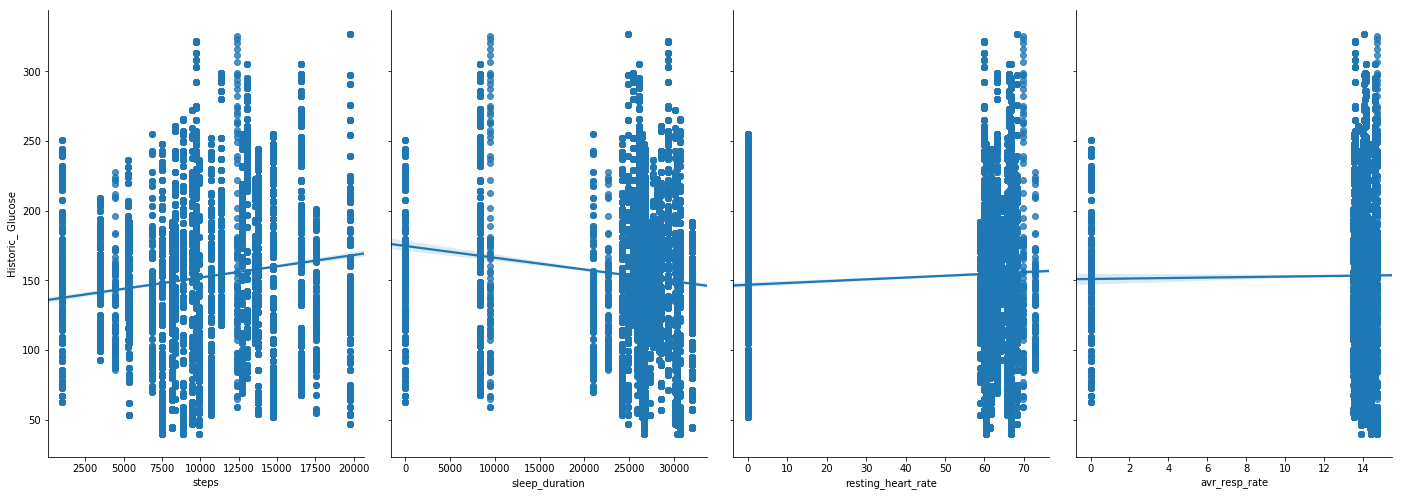

In [360]:
sns.pairplot(g_sleep_steps_gps, x_vars = ['steps', 'sleep_duration','resting_heart_rate','avr_resp_rate']  , y_vars = 'Historic_ Glucose',size = 7, aspect =0.7, kind = 'reg')

# Dimensionaltiy Reduction of the parameters 

In [363]:
df = g_sleep_steps_gps.loc[:,['cgmdate','steps', 'sleep_duration','time_spent','type','Historic_ Glucose' ]]

#Checking a final sample before training a model

In [364]:
df.sample(5)

,cgmdate,steps,sleep_duration,time_spent,type,Historic_ Glucose
5127,10212017,11379,25475,3:03,place unique,136.0
8186,10152017,8135,32056,0:04,place unique,148.0
2575,10292017,8897,30704,23:01,place 1,250.0
307,10182017,17511,25898,0:07,place unique,125.0
1948,10302017,9429,30088,3:49,place 2,53.0


# Writing the dataframe to a new .csv file

In [366]:
df.to_csv('final_df')